In [1]:


import ast
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\JA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\JA\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Dec 24 13:46:28 2024).


In [2]:
#FILTER FOR US DATA ANALYST ROLES

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

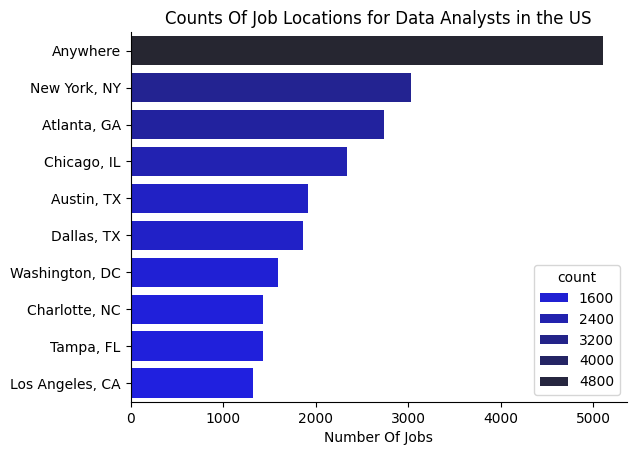

In [6]:

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts Of Job Locations for Data Analysts in the US')
plt.xlabel('Number Of Jobs')
plt.ylabel('')
plt.show()


In [ ]:
#only get data analyst jobs in the US

# df_DA_US = df[(df['job_title_short'] == 'Data Analyst')  & (df['job_country'] == 'United States')].copy()

# # drop NaN values from the 'salary_year_avg' column for accurate visualization

# df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


# df_DA_US = df_DA_US.explode('job_skills')

# df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

# df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

# df_DA_skills = df_DA_US_group.sort_values(by='count' , ascending=False).head(10)
# fig, ax = plt.subplots(2, 1)
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
# ax[0].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[0].set_ylabel('')
# ax[0].set_xlabel('')
# ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
# ax[1].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[1].set_ylabel('')
# ax[1].set_xlabel('Median Salary (USD)')
# ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# ax[1].set_xlim(ax[0].get_xlim())
# fig.tight_layout()
# fig, ax = plt.subplots(2, 1)


# #TOP PAY
# sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
# ax[0].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[0].set_ylabel('')
# ax[0].set_xlabel('')
# ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))


# #JOB SKILLS
# sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b  ')
# ax[1].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[1].set_ylabel('')
# ax[1].set_xlabel('Median Salary (USD)')
# ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# ax[1].set_xlim(ax[0].get_xlim())
# fig.tight_layout()